<a href="https://colab.research.google.com/github/JainArpit-07/PRODIGY_DS_03/blob/main/PRODIGY_DS_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/bank.csv')

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [7]:
df.shape

(11162, 17)

In [8]:
for col in df.select_dtypes(include = 'object').columns:
  print(col)
  print(df[col].unique())

job
['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
marital
['married' 'single' 'divorced']
education
['secondary' 'tertiary' 'primary' 'unknown']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'other' 'failure' 'success']
deposit
['yes' 'no']


##Exploratory Data Analysis

In [9]:
# find missing values
features_na = [features for features in df.columns if df[features].isnull().sum() > 0]
for feature in features_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')
else:
    print("No missing value found")

No missing value found


In [10]:
for column in df.columns:
    print(column,df[column].nunique())

age 76
job 12
marital 3
education 4
default 2
balance 3805
housing 2
loan 2
contact 3
day 31
month 12
duration 1428
campaign 36
pdays 472
previous 34
poutcome 4
deposit 2


In [11]:
categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['deposit']))]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [12]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is job and number of categories are 12
The feature is marital and number of categories are 3
The feature is education and number of categories are 4
The feature is default and number of categories are 2
The feature is housing and number of categories are 2
The feature is loan and number of categories are 2
The feature is contact and number of categories are 3
The feature is month and number of categories are 12
The feature is poutcome and number of categories are 4


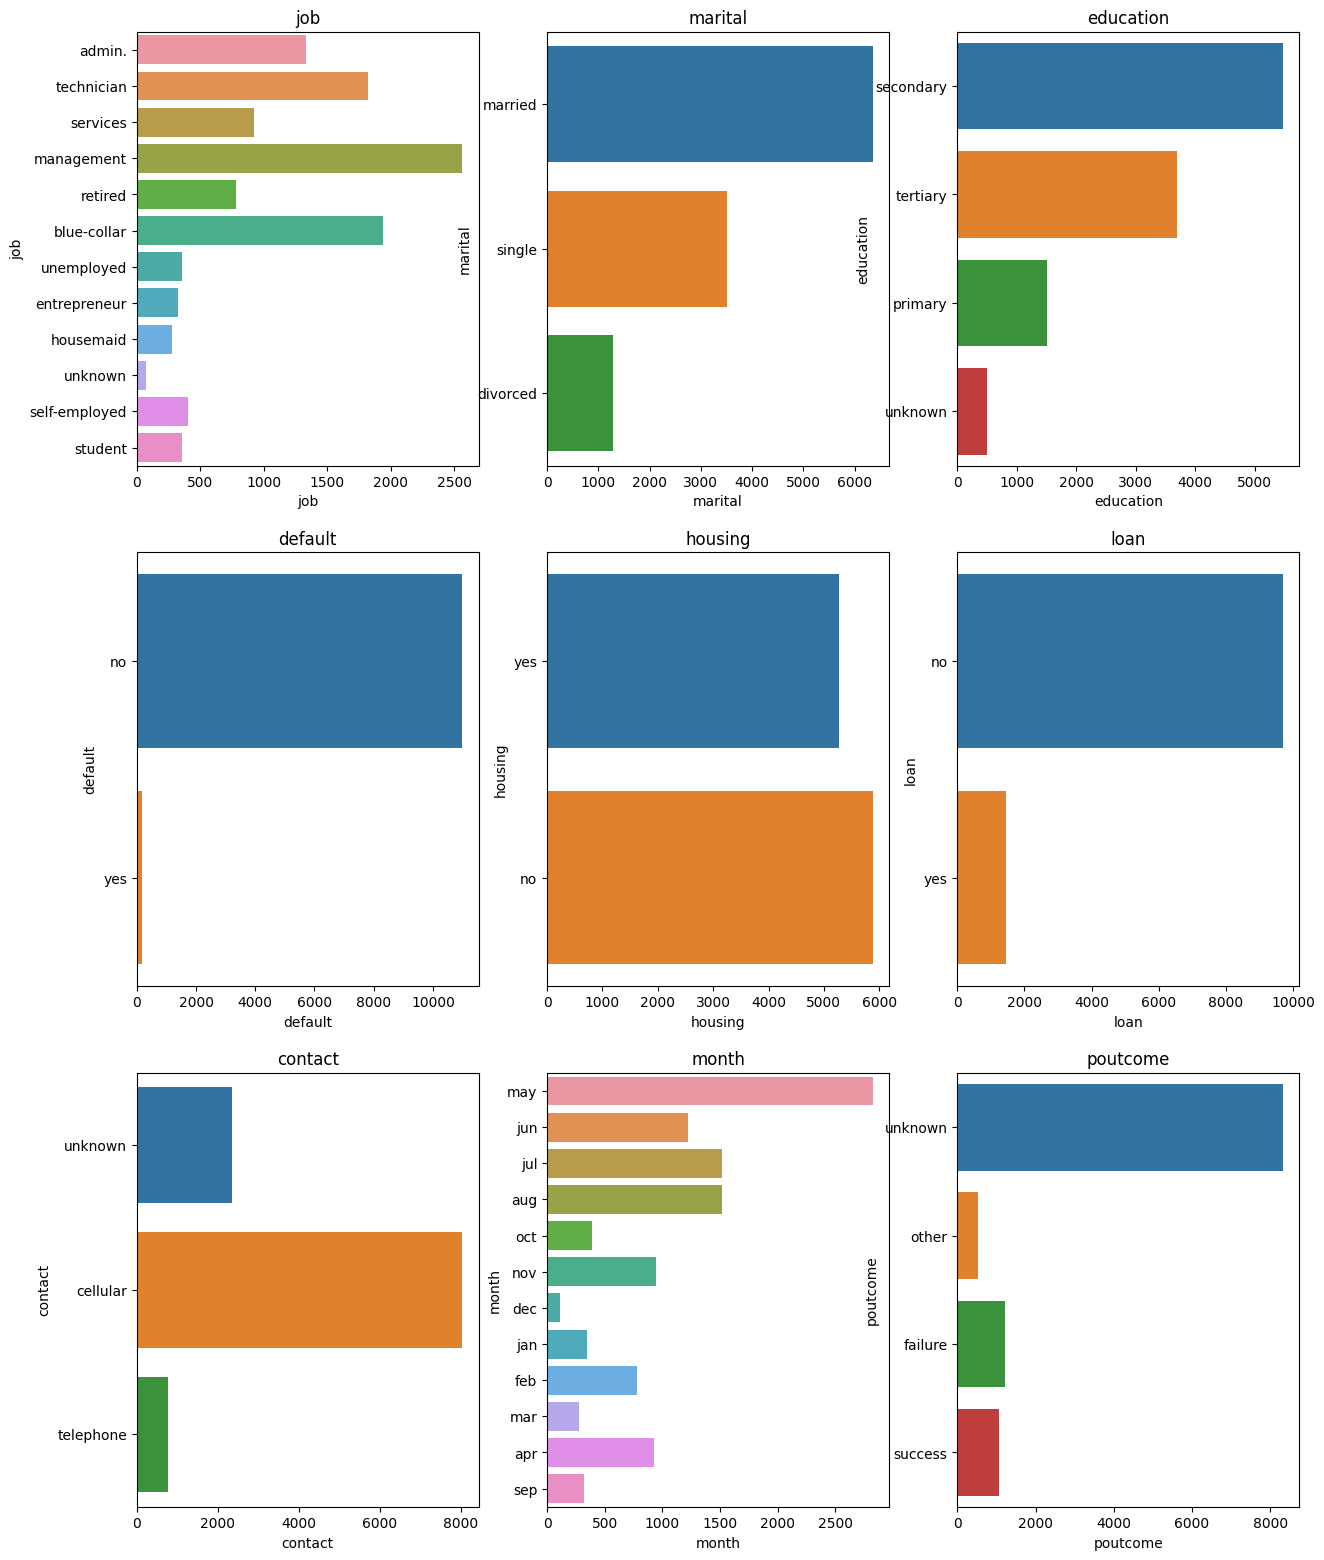

In [13]:
#check count based on categorical features
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

**Take-away**:

* client with job type as management records are high in given dataset and housemaid are very less
* client who married are high in records in given dataset and divorced are less
* client whoes education background is secondary are in high numbers in given dataset
* defualt feature seems to be does not play importand role as it has value of no at high ratio to value yes which can drop
* data in month of may is high and less in dec


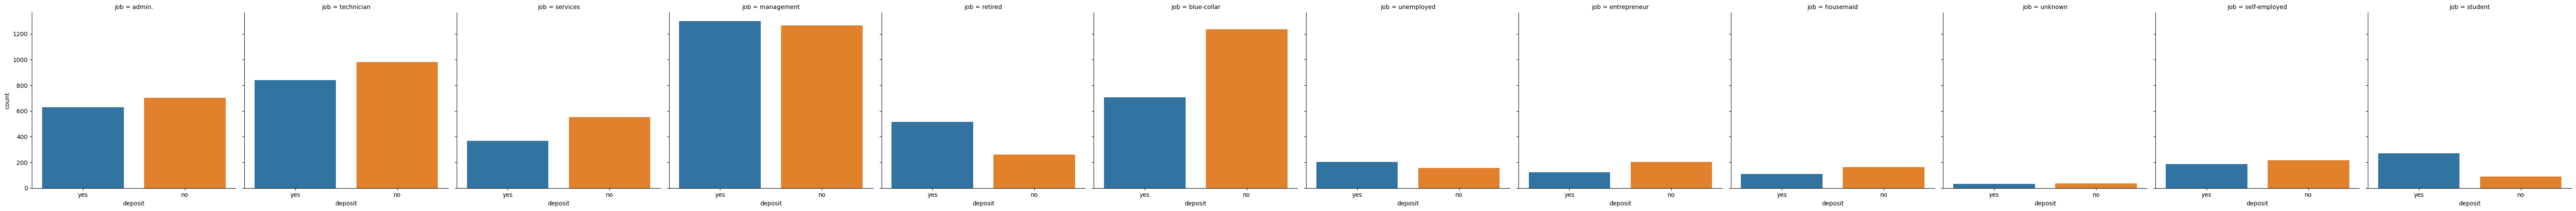

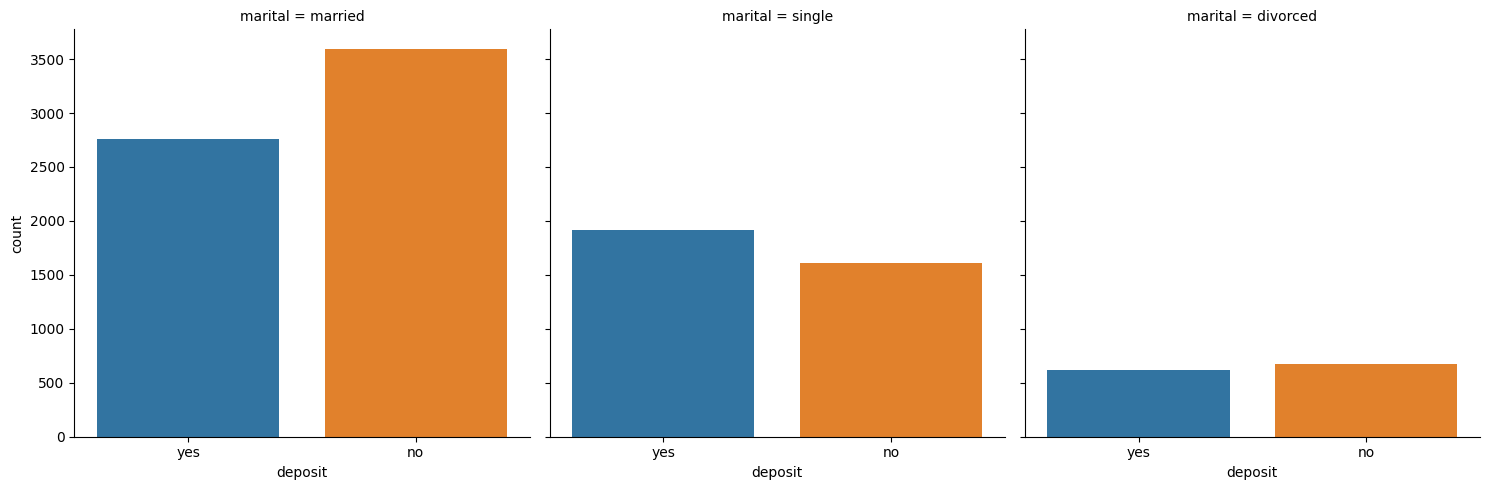

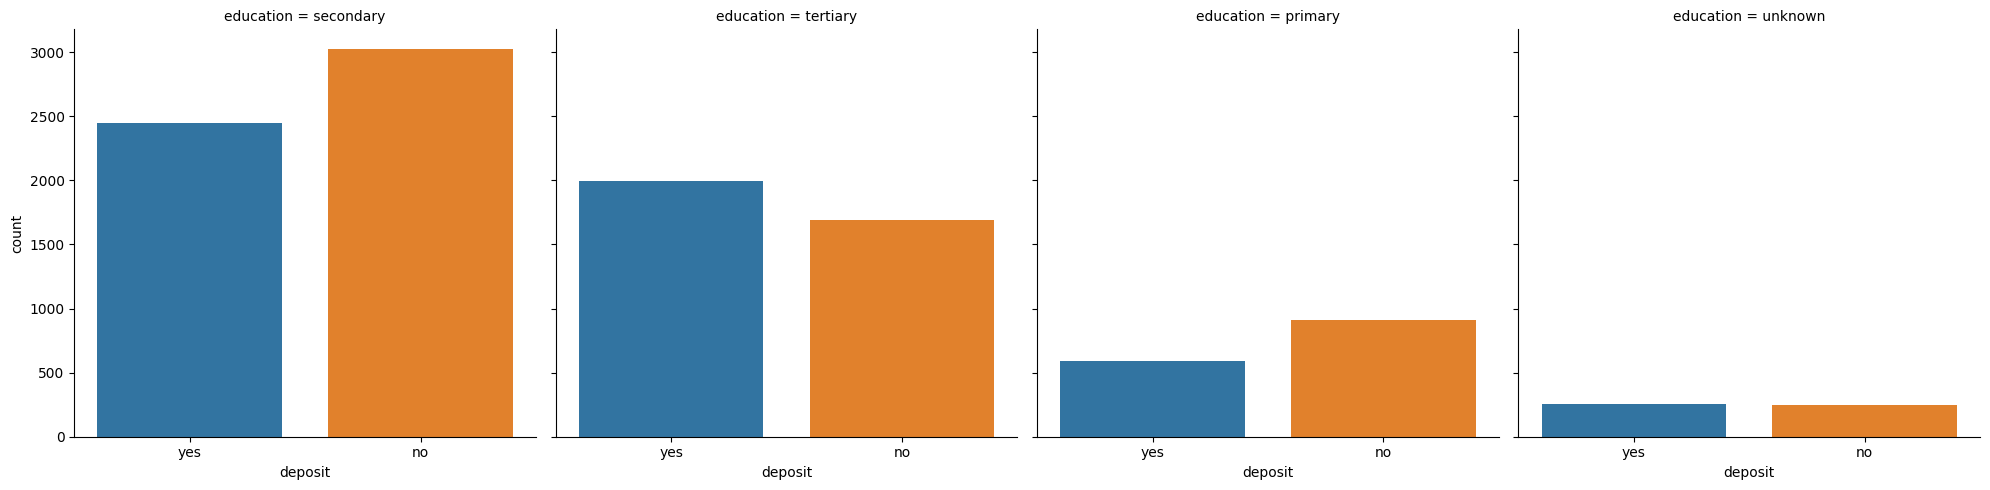

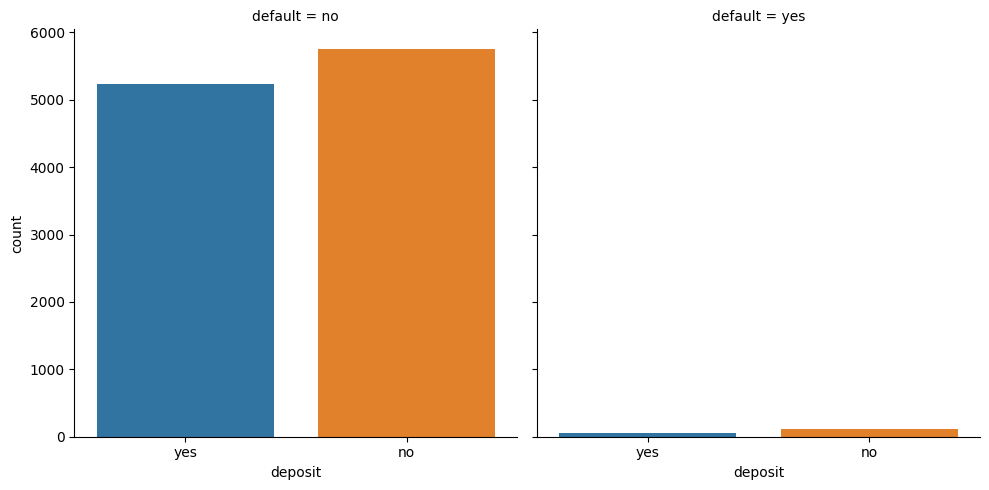

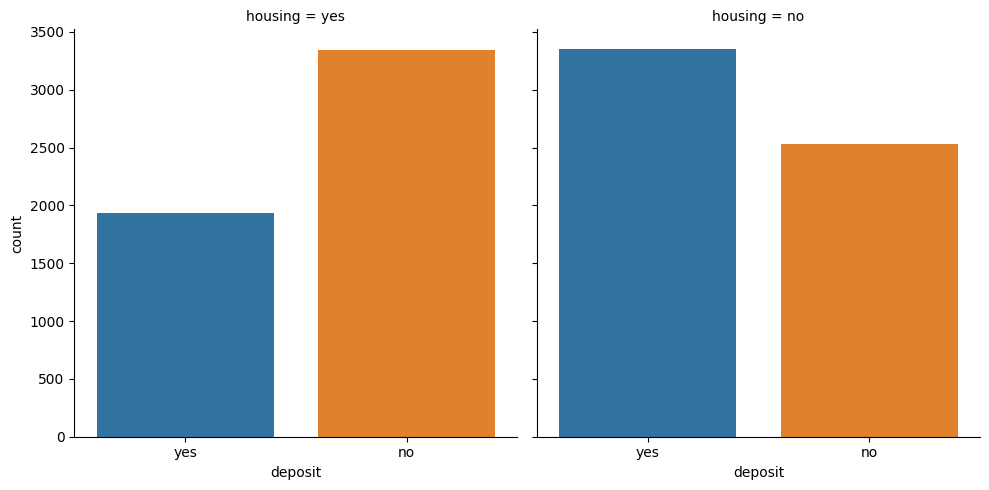

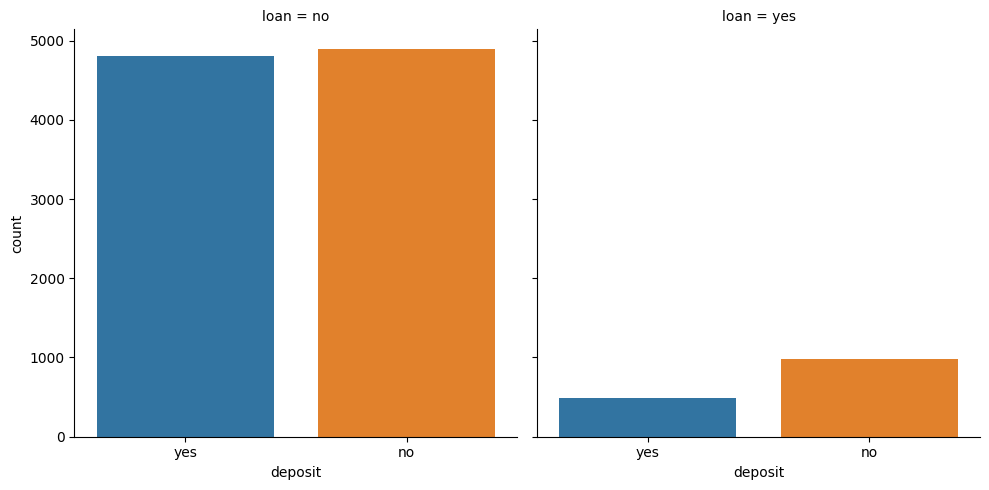

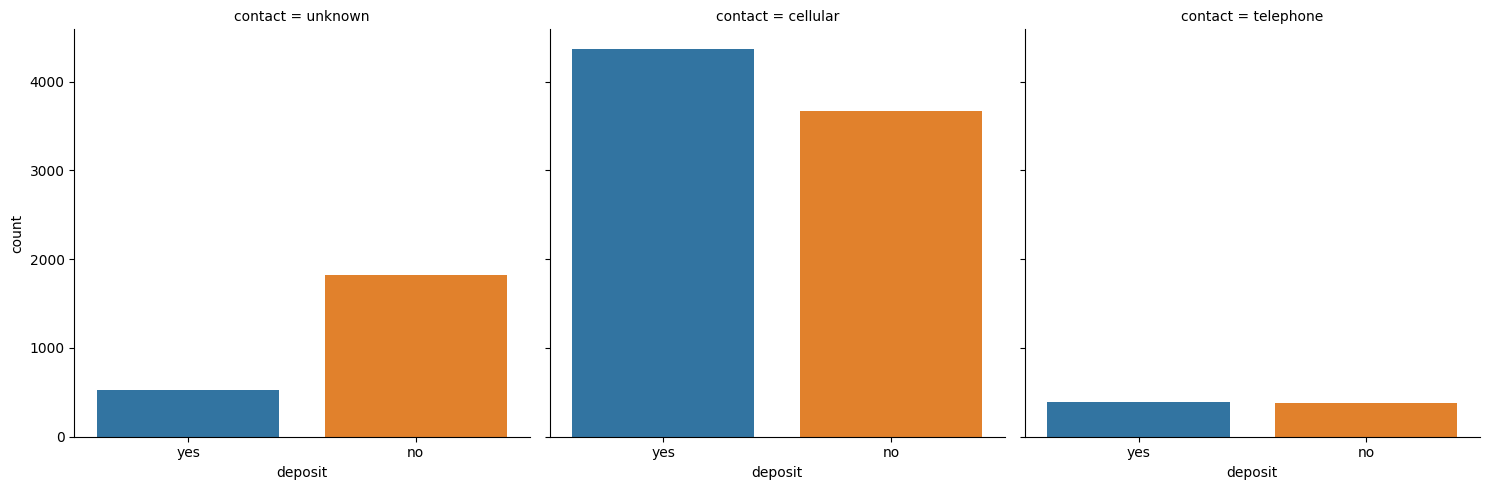

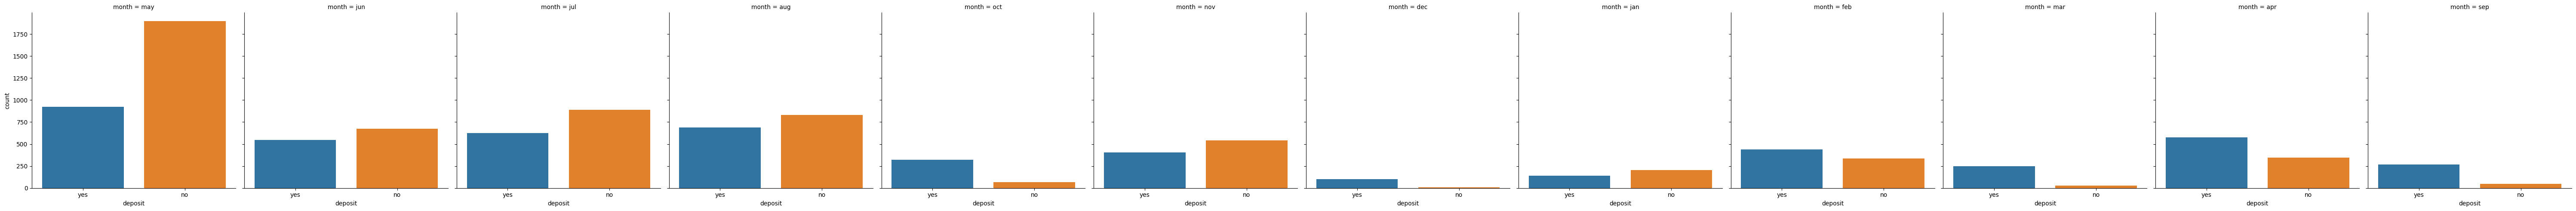

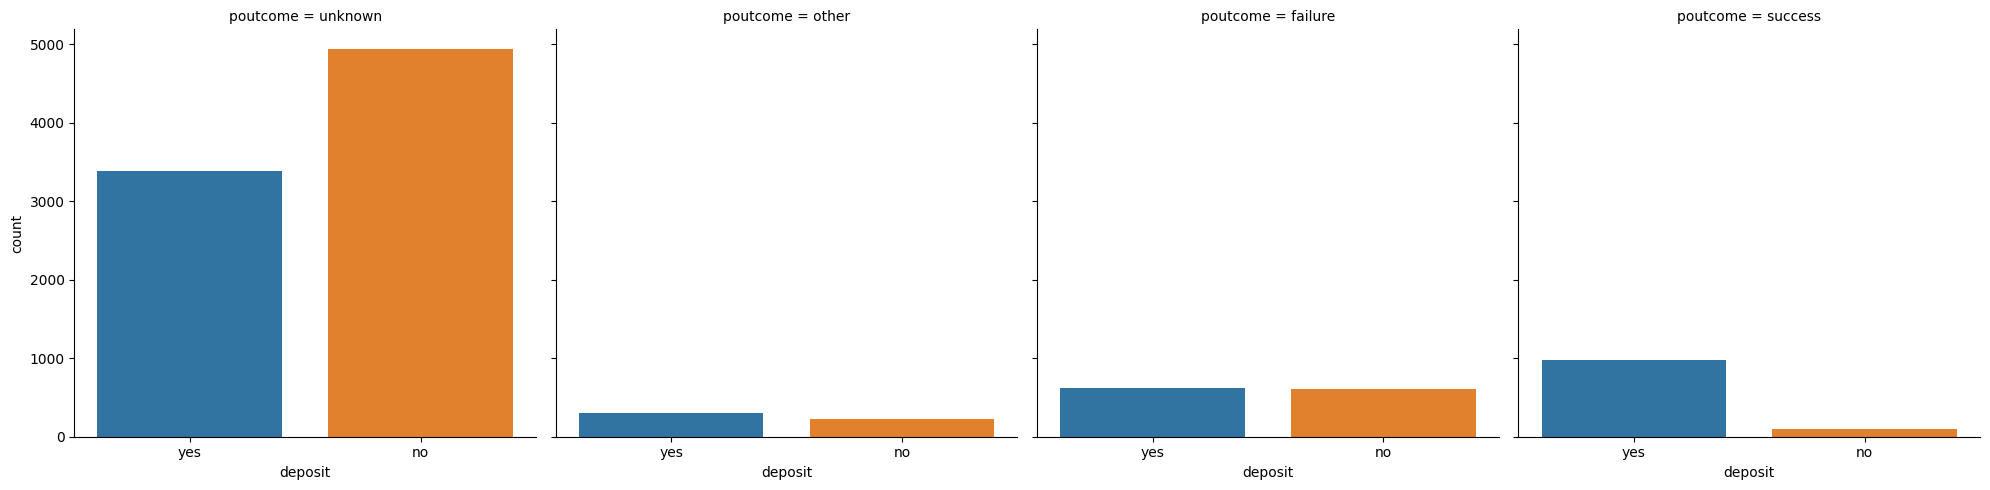

In [14]:
for categorical_feature in categorical_features:
    sns.catplot(x='deposit', col=categorical_feature, kind='count', data= df)
plt.show()

**Take-away**:

* retired client has high interest on deposit
* client who has housing loan seems to be not interested much on deposit
* if pre campagin outcome that is poutcome=success then, there is high chance of client to show interest on deposit
* in month of March, September, October and December, client show high interest to deposit
* in month of may, records are high but client interst ratio is very less

In [15]:
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['deposit']))]
print('Number of numerical variables: ', len(numerical_features))

df[numerical_features].head()

Number of numerical variables:  7


,age,balance,day,duration,campaign,pdays,previous
0,59,2343,5,1042,1,-1,0
1,56,45,5,1467,1,-1,0
2,41,1270,5,1389,1,-1,0
3,55,2476,5,579,1,-1,0
4,54,184,5,673,2,-1,0


In [16]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))


Discrete Variables Count: 0


In [17]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature+['deposit']]
print("Continuous feature Count {}".format(len(continuous_features)))

Continuous feature Count 7


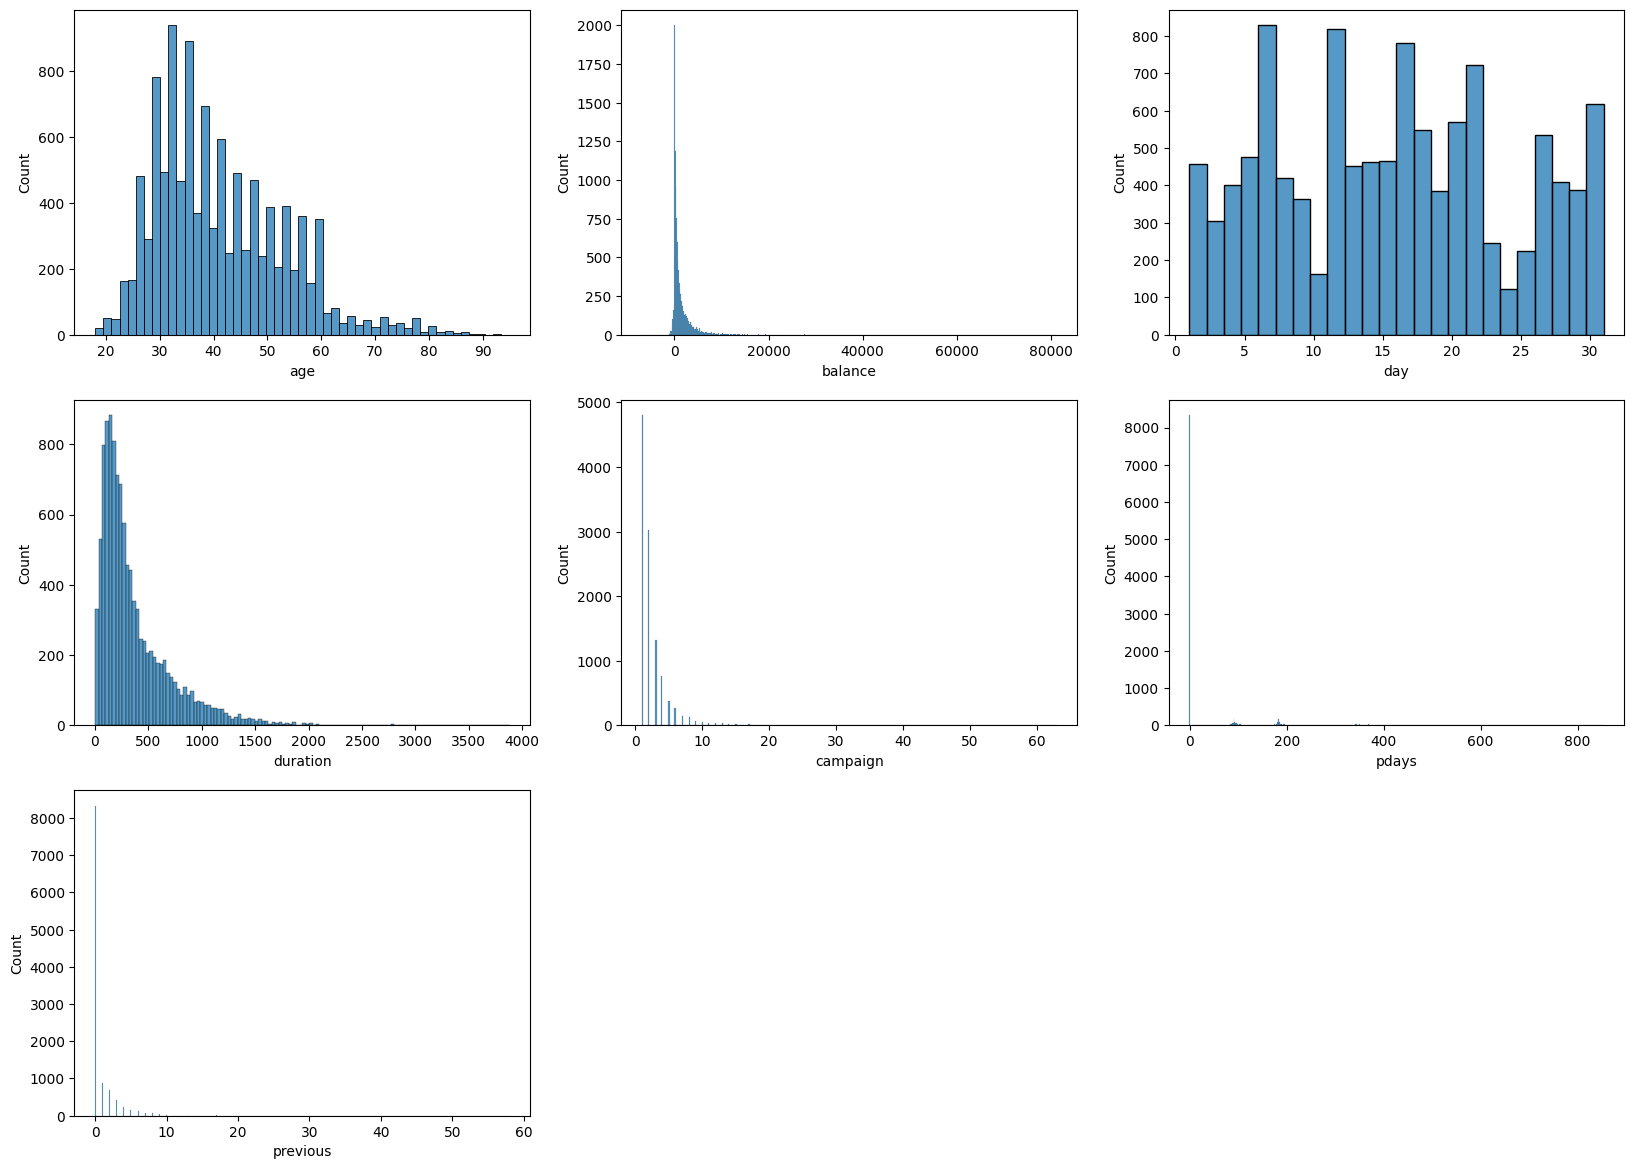

In [19]:
#plot a univariate distribution of continues observations
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for continuous_feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.histplot(df[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber+=1
plt.show()

**Take-away**:

* it seems age, days distributed normally
* balance, duration, compaign, pdays and previous heavely skewed towards left and seems to be have some outliers.

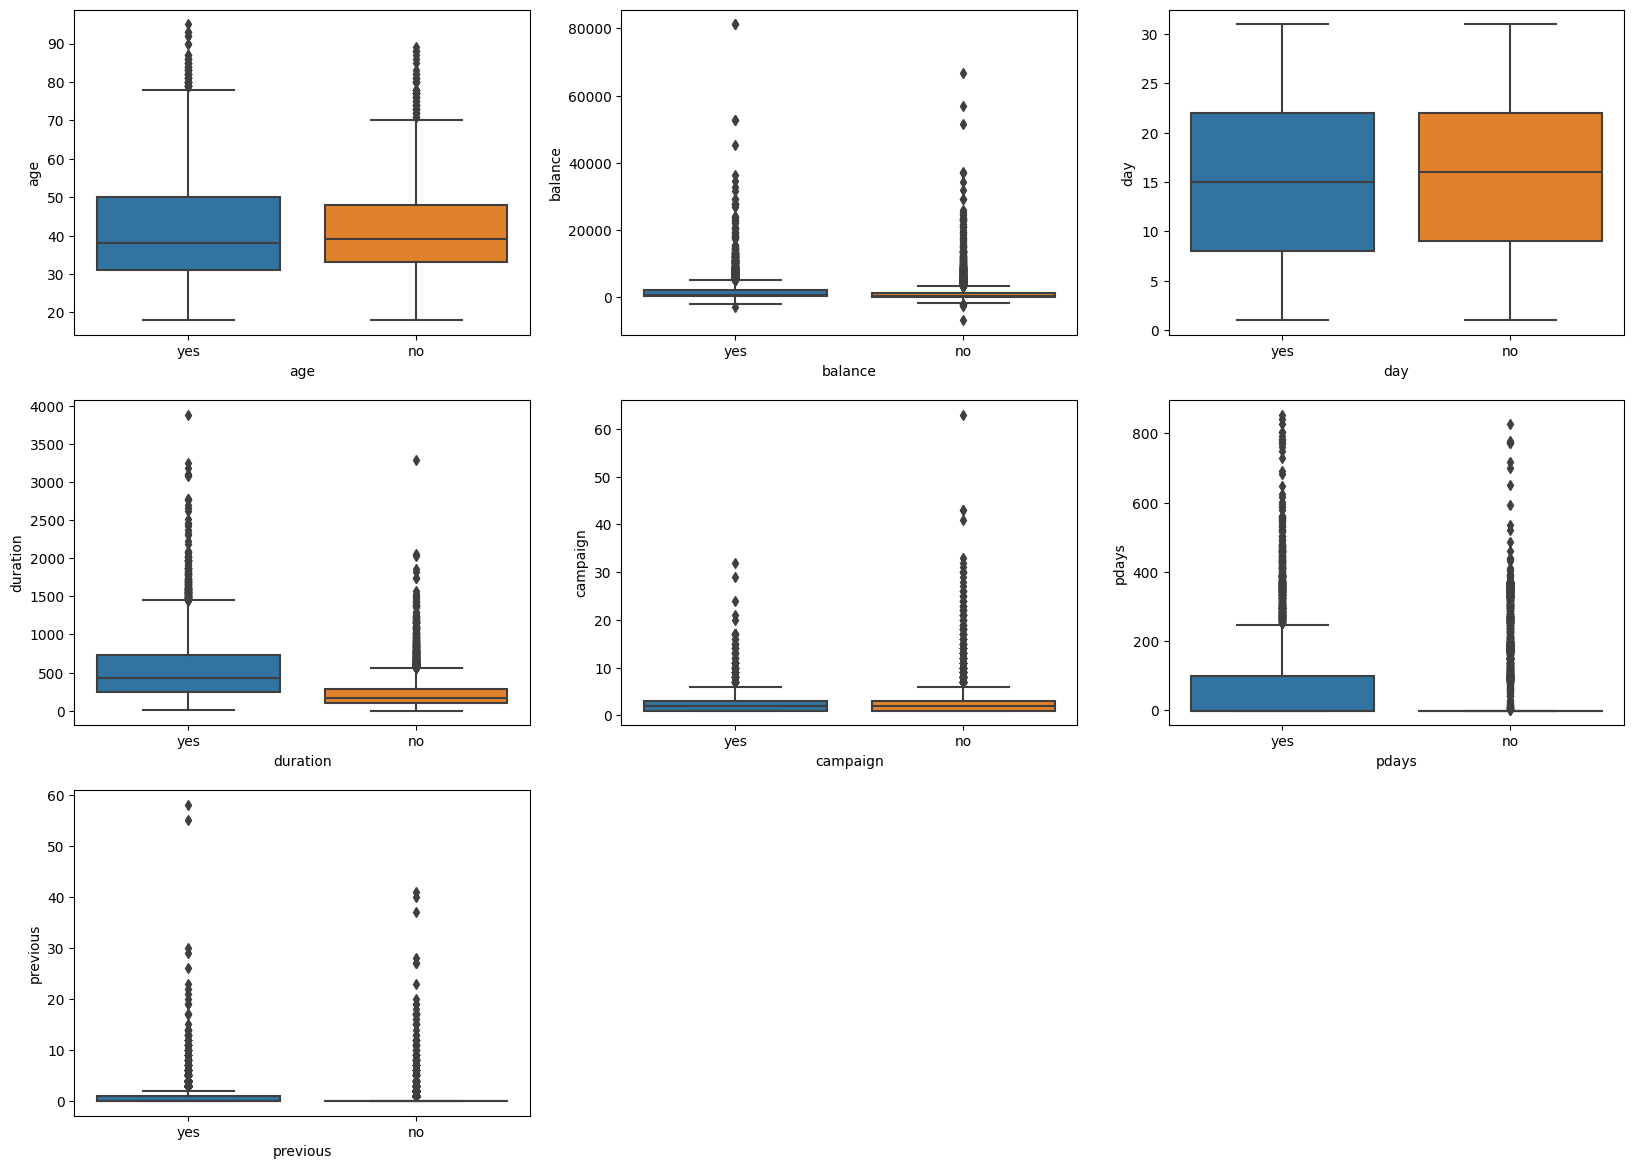

In [20]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="deposit", y= df[feature], data=df)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

**Take-away**:

* client shows interest on deposit who had discussion for longer duration

<ipython-input-21-d1055d820d99>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_mat=df.corr()


<Axes: >

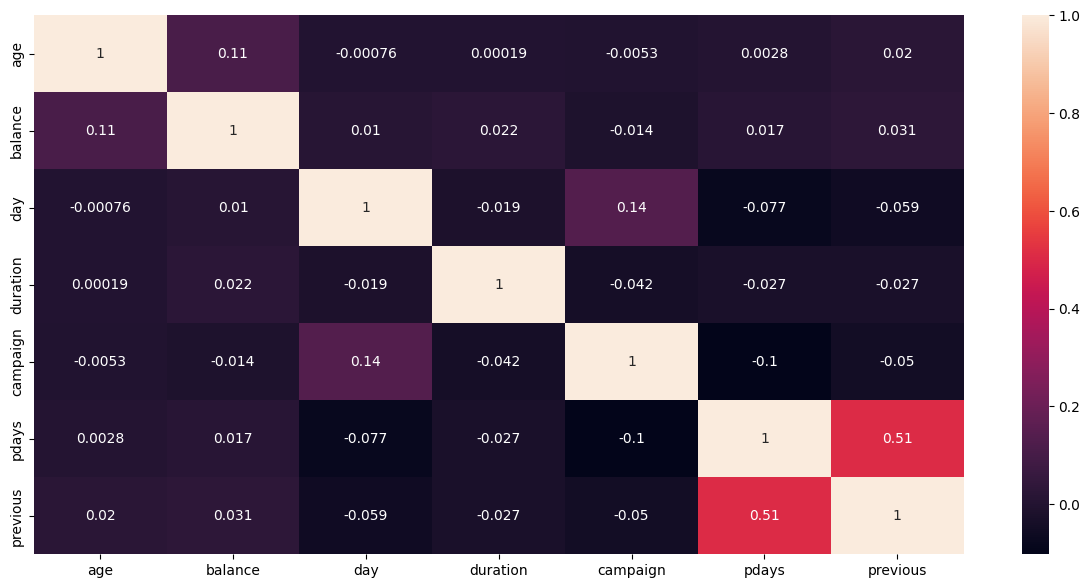

In [21]:
cor_mat=df.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

**Take-away:**

* it seems no feature is heavily correlated with other features

In [22]:
df['deposit'].groupby(df['deposit']).count()

deposit
no     5873
yes    5289
Name: deposit, dtype: int64

**Take away:**
* given dataset seems to be balanced.

###*As per Exploratory Data Analysis EDA*,

* no missing value found
* no feature found with one value
* 9 categorical features
* defaut features does not play imp role
* it seems some outliers found (age, balance, duration, compaign, pdays and previous has some outliers)

##Feature Engineering

In [27]:
df2 = df.copy()

In [28]:
df2.groupby(['deposit','default']).size()

deposit  default
no       no         5757
         yes         116
yes      no         5237
         yes          52
dtype: int64

In [29]:
df2.drop(['default'],axis=1, inplace=True)

In [30]:
df2.groupby(['deposit','pdays']).size()


deposit  pdays
no       -1       4940
          1          2
          2          6
          5          2
          6          2
                  ... 
yes       804        1
          805        1
          828        1
          842        1
          854        1
Length: 732, dtype: int64

In [31]:
df2.drop(['pdays'],axis=1, inplace=True)

In [33]:
df2.groupby(['deposit','balance'],sort=True)['balance'].count()

deposit  balance
no       -6847      1
         -2712      1
         -2282      1
         -2049      1
         -1965      1
                   ..
yes       34646     1
          36252     1
          45248     1
          52587     2
          81204     2
Name: balance, Length: 5082, dtype: int64

these outlier should not be remove as balance goes high, client show interest on deposit

In [34]:
df2.groupby(['deposit','duration'],sort=True)['duration'].count()

deposit  duration
no       2           1
         3           1
         4           2
         5           4
         6           6
                    ..
yes      3094        1
         3102        1
         3183        1
         3253        1
         3881        1
Name: duration, Length: 2157, dtype: int64

these outlier should not be remove as duration goes high, client show interest on deposit

In [35]:
df2.groupby(['deposit','campaign'],sort=True)['campaign'].count()

deposit  campaign
no       1           2237
         2           1627
         3            703
         4            454
         5            239
         6            173
         7             92
         8             96
         9             51
         10            38
         11            24
         12            25
         13            24
         14            11
         15             9
         16             7
         17             8
         18             8
         19             5
         20             4
         21             7
         22             4
         23             3
         24             4
         25             3
         26             3
         27             1
         28             1
         29             1
         30             4
         31             1
         32             1
         33             1
         41             1
         43             2
         63             1
yes      1           2561
         2          

In [36]:
df3 = df2[df2['campaign'] < 33]

Creating a new dataframe excluding the outliers

In [37]:
df3.groupby(['deposit','campaign'],sort=True)['campaign'].count()

deposit  campaign
no       1           2237
         2           1627
         3            703
         4            454
         5            239
         6            173
         7             92
         8             96
         9             51
         10            38
         11            24
         12            25
         13            24
         14            11
         15             9
         16             7
         17             8
         18             8
         19             5
         20             4
         21             7
         22             4
         23             3
         24             4
         25             3
         26             3
         27             1
         28             1
         29             1
         30             4
         31             1
         32             1
yes      1           2561
         2           1401
         3            618
         4            317
         5            139
         6          

In [38]:
df3.groupby(['deposit','previous'],sort=True)['previous'].count()

deposit  previous
no       0           4935
         1            304
         2            237
         3            141
         4             73
         5             44
         6             34
         7             23
         8             21
         9             10
         10             4
         11             8
         12             6
         13             2
         14             1
         15             4
         16             2
         17             8
         18             1
         19             2
         20             1
         23             1
         27             2
         28             1
         37             1
         40             1
         41             1
yes      0           3384
         1            583
         2            456
         3            294
         4            171
         5            121
         6             83
         7             54
         8             39
         9             24
         10         

In [55]:
df4 = df3[df3['previous'] < 31]

Treating values greater than 30 has outliers, therefire creating a new dataset excluding outliers

In [56]:
cat_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
for col in  cat_columns:
    df4 = pd.concat([df4.drop(col, axis=1),pd.get_dummies(df4[col], prefix=col, prefix_sep='_',drop_first=True, dummy_na=False)], axis=1)

In [57]:
bool_columns = ['housing', 'loan', 'deposit']
for col in  bool_columns:
    df4[col+'_new']=df4[col].apply(lambda x : 1 if x == 'yes' else 0)
    df4.drop(col, axis=1, inplace=True)

In [58]:
df4.head()

,age,balance,day,duration,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,housing_new,loan_new,deposit_new
0,59,2343,5,1042,1,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,1
1,56,45,5,1467,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
2,41,1270,5,1389,1,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,1
3,55,2476,5,579,1,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,1
4,54,184,5,673,2,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1


##Splitting the dataset

In [59]:
X = df4.drop(['deposit_new'],axis=1)
y = df4['deposit_new']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=1)

In [60]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8364, 40)
(2788, 40)
(8364,)
(2788,)


##Model Selection

In [67]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

def eval_model(y_test, y_pred):
  acc = accuracy_score(y_test, y_pred)
  print('Accuracy_Score',acc)
  cm = confusion_matrix(y_test,y_pred)
  print('Confusion matrix\n', cm)
  print('Classification Report\n', classification_report(y_test,y_pred))

def mscore(model):
  train_score = model.score(x_train, y_train)
  test_score = model.score(x_test, y_test)
  print('Training Score', train_score)
  print('Testing Score', test_score)

In [68]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='gini', max_depth=5,min_samples_split=10)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [69]:
mscore(dt)

Training Score 0.8133668101386896
Testing Score 0.8059540889526542


In [70]:
ypred_dt = dt.predict(x_test)

In [71]:
print(ypred_dt)

[0 0 1 ... 0 0 1]


In [72]:
eval_model(y_test, ypred_dt)

Accuracy_Score 0.8059540889526542
Confusion matrix
 [[1116  321]
 [ 220 1131]]
Classification Report
               precision    recall  f1-score   support

           0       0.84      0.78      0.80      1437
           1       0.78      0.84      0.81      1351

    accuracy                           0.81      2788
   macro avg       0.81      0.81      0.81      2788
weighted avg       0.81      0.81      0.81      2788



In [73]:
from sklearn.tree import plot_tree

In [74]:
cn = ['no', 'yes']
fn = x_train.columns
print(fn)

Index(['age', 'balance', 'day', 'duration', 'campaign', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'contact_telephone',
       'contact_unknown', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'housing_new', 'loan_new'],
      dtype='object')


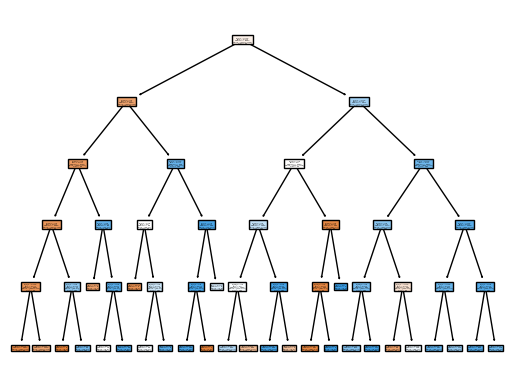

In [76]:
plot_tree(dt,class_names=cn,filled=True)
plt.show()

In [82]:
dt1 = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=15)

In [83]:
dt1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=15)

In [84]:
mscore(dt1)

Training Score 0.7715208034433285
Testing Score 0.7679340028694405


In [86]:
y_pred_dt1 = dt1.predict(x_test)

In [88]:
eval_model(y_test,y_pred_dt1)

Accuracy_Score 0.7679340028694405
Confusion matrix
 [[1278  159]
 [ 488  863]]
Classification Report
               precision    recall  f1-score   support

           0       0.72      0.89      0.80      1437
           1       0.84      0.64      0.73      1351

    accuracy                           0.77      2788
   macro avg       0.78      0.76      0.76      2788
weighted avg       0.78      0.77      0.76      2788



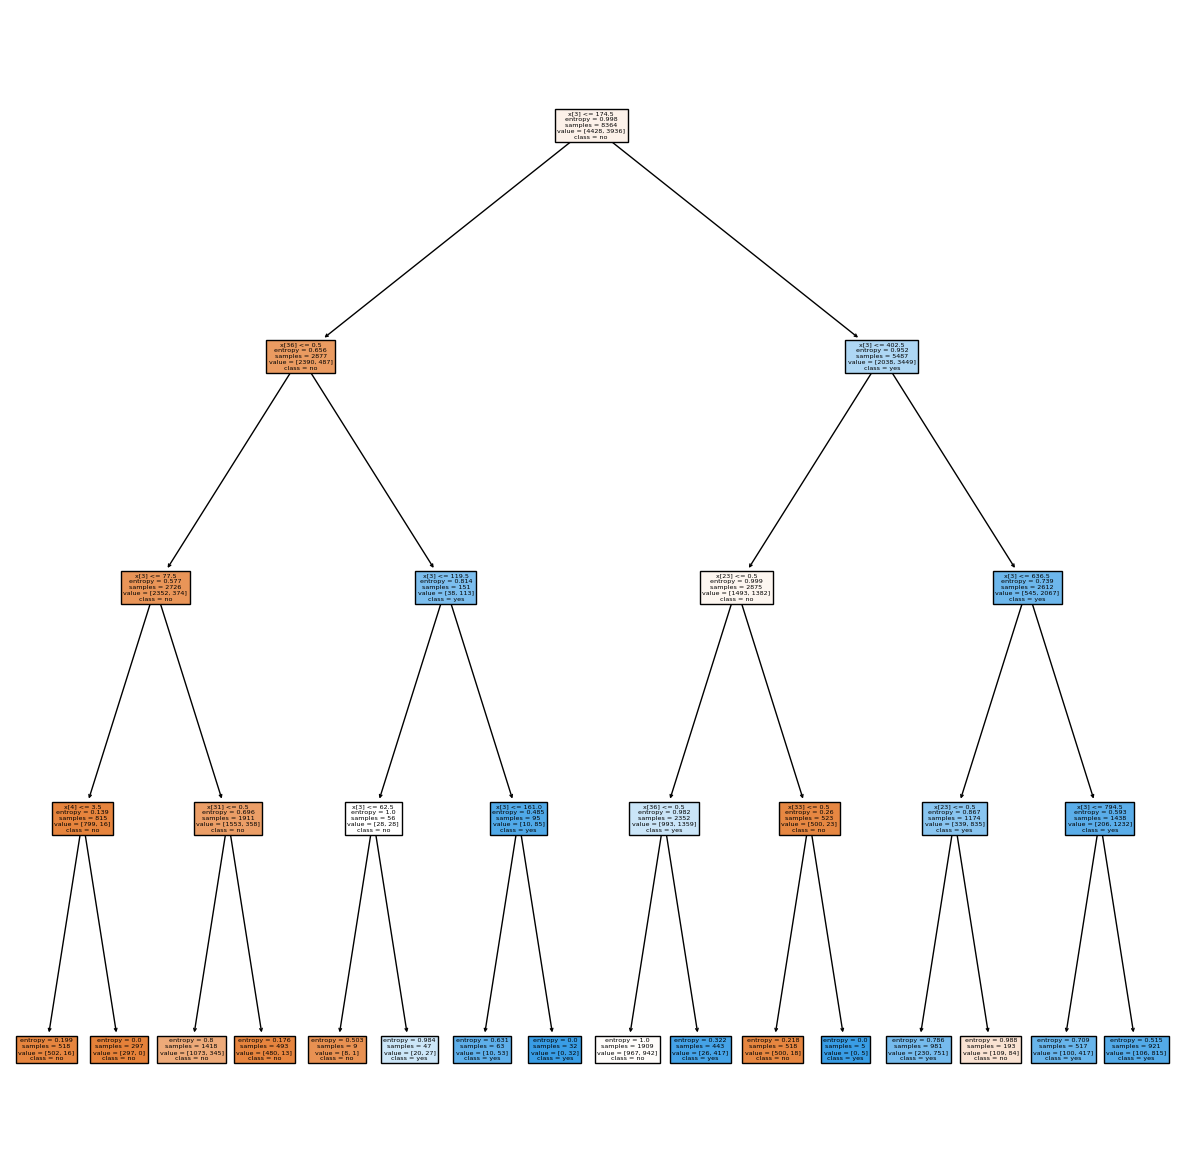

In [89]:
plt.figure(figsize=(15,15))
plot_tree(dt1,class_names=cn,filled=True)
plt.show()